## PREPARING THE DATA

In [1]:
# =========== IMPORT UTILS ===========
from utils.utils import *
import pickle

In [2]:

# Load dataset and sequance list

X_train=load_p("fitted_models/X_train.pkl")
y_train=load_p("fitted_models/y_train.pkl")

X_test=load_p("fitted_models/X_test.pkl")
y_test=load_p("fitted_models/y_test.pkl")

X_tiny=load_p("fitted_models/X_tiny.pkl")
y_tiny=load_p("fitted_models/y_tiny.pkl")

sequence_list = load_p("fitted_models/sequence_list.pkl")



In [3]:
# =========== CREATE DICTIONARIES WITH UNIQUE INDEX  ===========

# To store values efficiently (INTEGERS/WORDS and INTEGERS/TAGS)
# x attribute: list of words (integer words)
# y attribute: list of tags (integer tags)
# Then we need to keep a mapping from integers to words and from integers to tags.

corpus_word_dict, corpus_tag_dict = create_corpus(X_train, y_train)

In [4]:
# =========== CREATE TAGS  ===========

train_tag_pos = [[corpus_tag_dict[i] for i in tag] for tag in y_train]
y_train_true = [tag for array in train_tag_pos for tag in array]

test_tag_pos = [[corpus_tag_dict[i] for i in tag] for tag in y_test]
y_test_true = [tag for array in test_tag_pos for tag in array]

tiny_tag_pos = [[corpus_tag_dict[i] for i in tag] for tag in y_tiny]
y_tiny_true = [tag for array in tiny_tag_pos for tag in array]

## MODELS

In [5]:

# =========== MODELS - Default Features ===========
feature_mapper = IDFeatures(sequence_list)
feature_mapper.build_features()

# =========== MODELS IMPORT  ===========

structured_perceptron = StructuredPerceptron(corpus_word_dict, corpus_tag_dict, feature_mapper)
structured_perceptron.load_model(dir='fitted_models/default_features_model_wo_cython.pkl')
structured_perceptron.parameters

array([ 8.,  9., 11., ..., -2.,  2.,  0.])

In [6]:
load_predictions=True

In [7]:
datasets = ["train", "test", "tiny"]
models = ["default", "extra"]

# Genera todas las combinaciones y crea el diccionario
dic_metrics = {f"{dataset}-{model}": None for dataset in datasets for model in models}

# Muestra el diccionario generado
print(dic_metrics)

{'train-default': None, 'train-extra': None, 'test-default': None, 'test-extra': None, 'tiny-default': None, 'tiny-extra': None}


Metrics:


,% of correct sentences,% of tags correct,F1 Score,Accuracy
0,40.93,55.99,92.31,93.21



Confusion Matrix



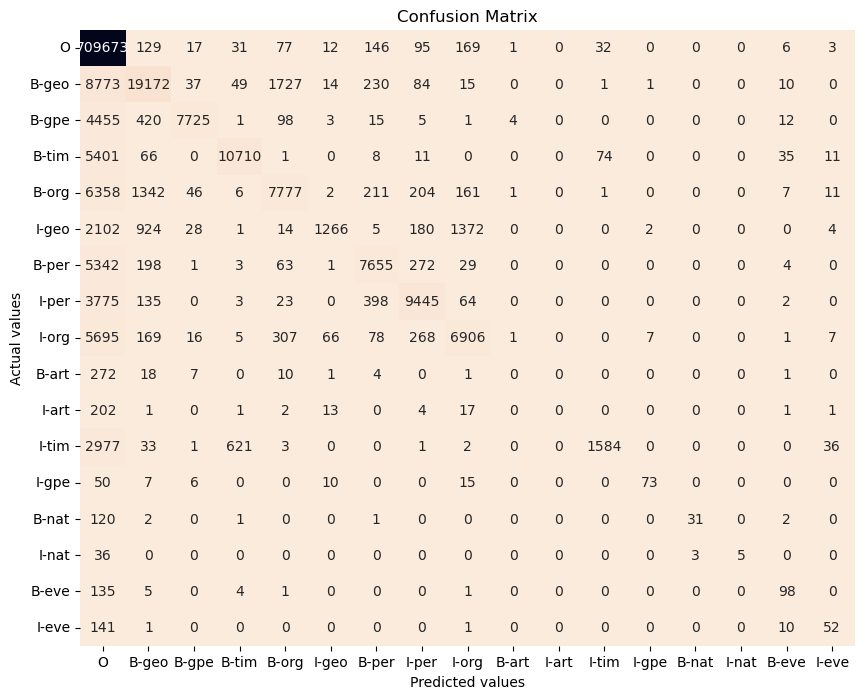


Metrics by tag



c:\Users\Nainh\.conda\envs\quora_test_env\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Nainh\.conda\envs\quora_test_env\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Nainh\.conda\envs\quora_test_env\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", le

,precision,recall,f1-score
O,0.939333,0.998989,0.968243
B-geo,0.847494,0.636669,0.727107
B-gpe,0.979833,0.606406,0.749164
B-tim,0.936516,0.656371,0.771808
B-org,0.769771,0.482235,0.592985
I-geo,0.912104,0.214649,0.347516
B-per,0.874757,0.564195,0.685963
I-per,0.893651,0.682196,0.773736
I-org,0.788897,0.510572,0.619928
B-art,0.000000,0.000000,0.000000


In [8]:
dic_metrics["train-default"]=evaluate(X_train,structured_perceptron,
         train_tag_pos,corpus_tag_dict ,
         y_train_true,
         "pred_train_default",load=load_predictions)

Metrics:


,% correct Sentences,% of Tags Correct,F1 score,Accuracy
0,21.11,13.83,82.32,86.76



Confusion Matrix



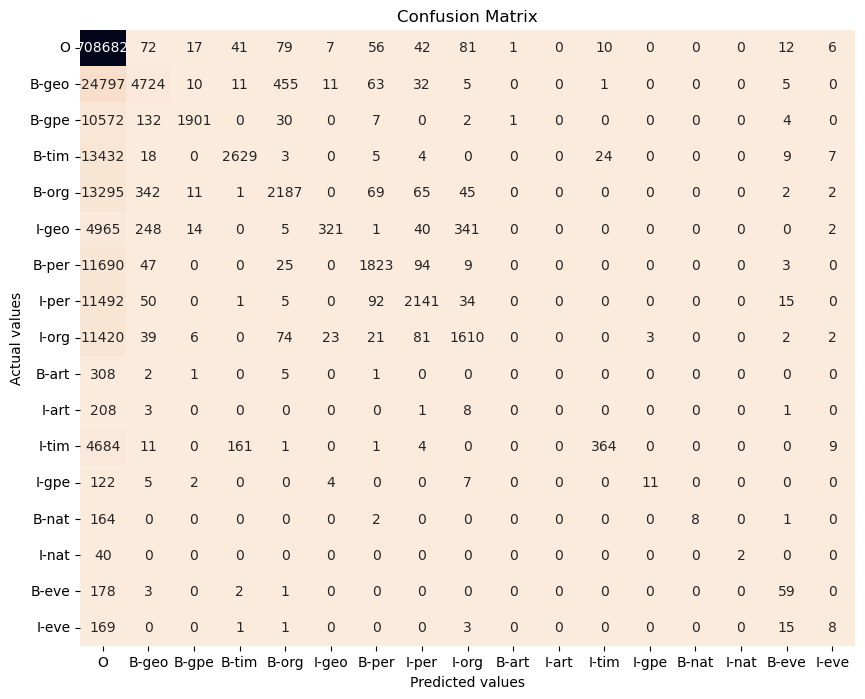


Metrics by tag



c:\Users\Nainh\.conda\envs\quora_test_env\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Nainh\.conda\envs\quora_test_env\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Nainh\.conda\envs\quora_test_env\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", le

,precision,recall,f1-score
O,0.868251,0.999402,0.929222
B-geo,0.829354,0.156871,0.263837
B-gpe,0.968909,0.150289,0.260215
B-tim,0.923428,0.162978,0.277058
B-org,0.761755,0.136525,0.231551
I-geo,0.877049,0.054068,0.101856
B-per,0.851471,0.133153,0.230293
I-per,0.855032,0.154808,0.262153
I-org,0.750583,0.121226,0.208738
B-art,0.000000,0.000000,0.000000


In [10]:
dic_metrics["test-default"]=evaluate(X_test,structured_perceptron,
         test_tag_pos,corpus_tag_dict ,
         y_test_true,
         "pred_test_default",load=load_predictions)

Metrics:


,% correct Sentences,% of Tags Correct,F1 score,Accuracy
0,7.69,26.47,79.12,82.88



Confusion Matrix



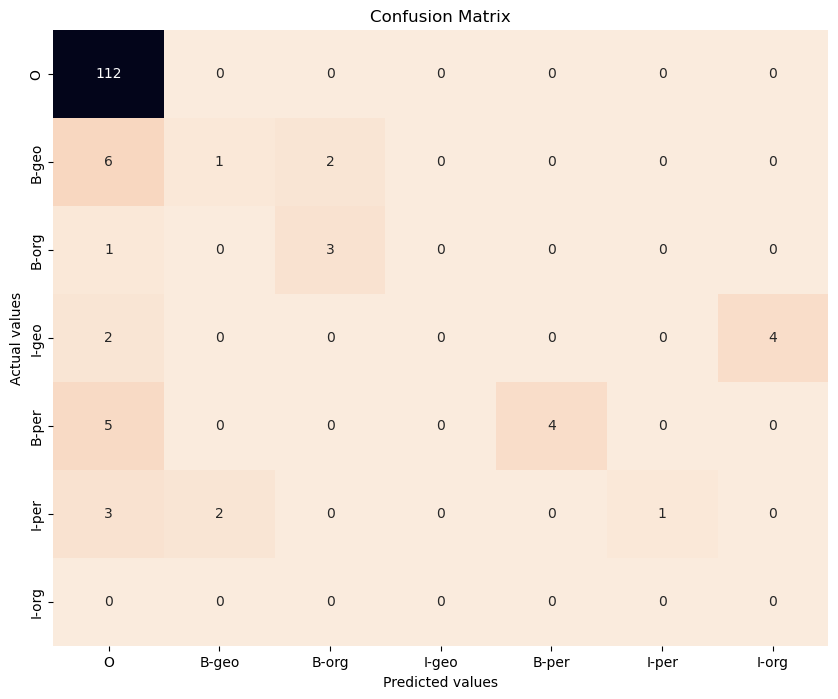


Metrics by tag



c:\Users\Nainh\.conda\envs\quora_test_env\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Nainh\.conda\envs\quora_test_env\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Nainh\.conda\envs\quora_test_env\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result

,precision,recall,f1-score
O,0.868217,1.000000,0.929461
B-geo,0.333333,0.111111,0.166667
B-org,0.600000,0.750000,0.666667
I-geo,0.000000,0.000000,0.000000
B-per,1.000000,0.444444,0.615385
I-per,1.000000,0.166667,0.285714
I-org,0.000000,0.000000,0.000000
accuracy,0.828767,0.828767,0.828767
macro avg,0.543079,0.353175,0.380556
weighted avg,0.805756,0.828767,0.791226


In [11]:


dic_metrics["tiny-default"]=evaluate(X_tiny,structured_perceptron,
         tiny_tag_pos,corpus_tag_dict ,
         y_tiny_true,
         "pred_tiny_default",load=load_predictions)

In [12]:
from skseq.sequences import extended_feature

extra_mapping_feature = extended_feature.ExtendedFeatures(sequence_list) 
extra_mapping_feature.build_features()

structured_perceptron_extraf = StructuredPerceptron(corpus_word_dict, corpus_tag_dict, extra_mapping_feature)
structured_perceptron_extraf.load_model(dir='fitted_models/extra_features_model_wo_cython.pkl')

Metrics:


,% of correct sentences,% of tags correct,F1 Score,Accuracy
0,50.43,73.99,95.71,95.47



Confusion Matrix



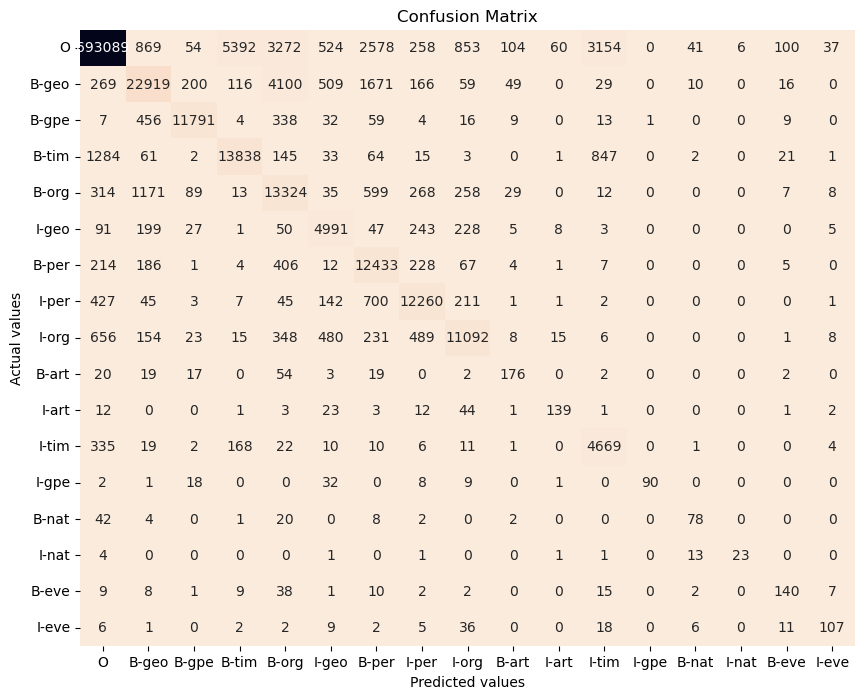


Metrics by tag



,precision,recall,f1-score
O,0.994701,0.975644,0.985081
B-geo,0.877719,0.761100,0.815260
B-gpe,0.964262,0.925583,0.944527
B-tim,0.707067,0.848073,0.771177
B-org,0.601074,0.826192,0.695879
I-geo,0.729999,0.846219,0.783824
B-per,0.674460,0.916347,0.777014
I-per,0.877783,0.885518,0.881634
I-org,0.860445,0.820050,0.839762
B-art,0.452442,0.560510,0.500711


In [13]:
dic_metrics["train-extra"]=evaluate(X_train,structured_perceptron_extraf,
         train_tag_pos,corpus_tag_dict ,
         y_train_true,
         "pred_train_extra",load=load_predictions)

Metrics:


,% correct Sentences,% of Tags Correct,F1 score,Accuracy
0,23.28,34.55,88.94,88.55



Confusion Matrix



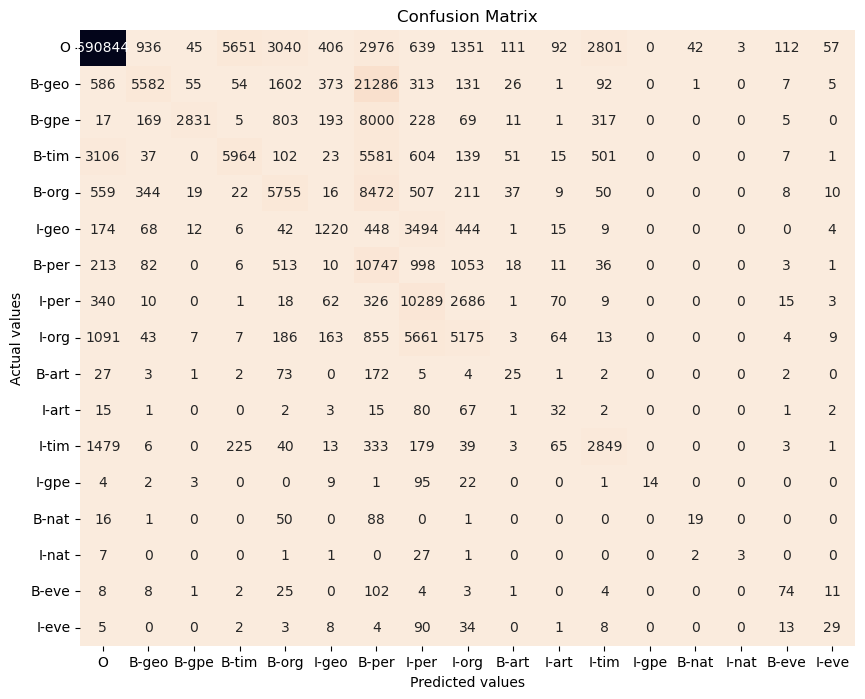


Metrics by tag



,precision,recall,f1-score
O,0.989052,0.974246,0.981593
B-geo,0.765496,0.185362,0.298455
B-gpe,0.951917,0.223812,0.362414
B-tim,0.499205,0.369723,0.424817
B-org,0.469604,0.359261,0.407088
I-geo,0.488000,0.205491,0.289202
B-per,0.180908,0.784968,0.294048
I-per,0.443243,0.743962,0.555517
I-org,0.452756,0.389654,0.418842
B-art,0.086505,0.078864,0.082508


In [14]:
dic_metrics["test-extra"]=evaluate(X_test,structured_perceptron_extraf,
         test_tag_pos,corpus_tag_dict ,
         y_test_true,
         "pred_test_extra",load=load_predictions)

Metrics:


,% correct Sentences,% of Tags Correct,F1 score,Accuracy
0,38.46,64.71,90.87,91.78



Confusion Matrix



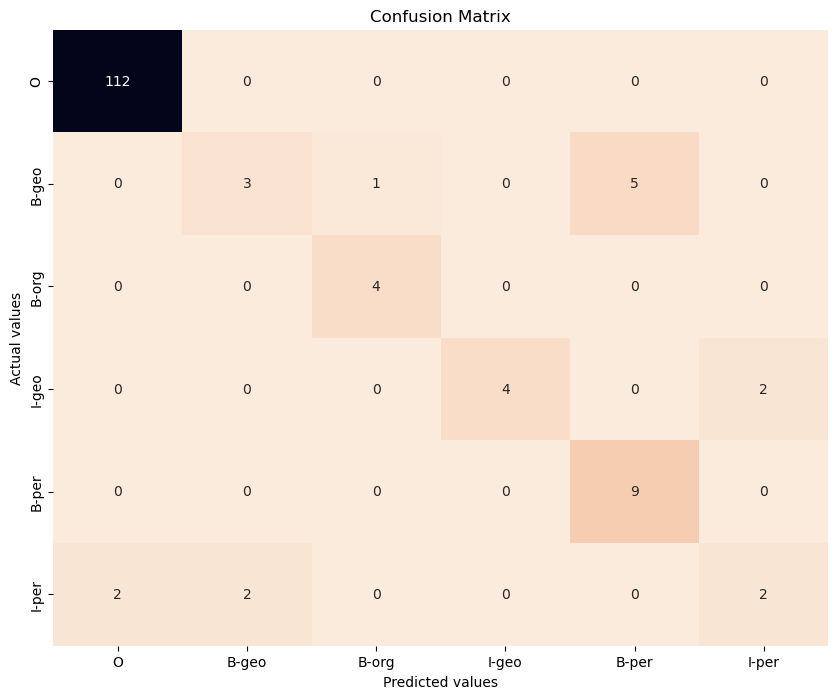


Metrics by tag



,precision,recall,f1-score
O,0.982456,1.000000,0.991150
B-geo,0.600000,0.333333,0.428571
B-org,0.800000,1.000000,0.888889
I-geo,1.000000,0.666667,0.800000
B-per,0.642857,1.000000,0.782609
I-per,0.500000,0.333333,0.400000
accuracy,0.917808,0.917808,0.917808
macro avg,0.754219,0.722222,0.715203
weighted avg,0.913841,0.917808,0.908665


In [15]:
dic_metrics["tiny-extra"]=evaluate(X_tiny,structured_perceptron_extraf,
         tiny_tag_pos,corpus_tag_dict ,
         y_tiny_true,
         "pred_tiny_extra",load=load_predictions)